# Naive Bayesian classifier

In [26]:
import numpy as np
import os
from skimage import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [27]:
#Variable for the folder path
folderPath = '../Untitled Folder/yalefaces_crop/'
dataPath = []
#print(os.listdir(base_path))
for i in os.listdir(folderPath):
    if i != 'Readme.txt':
        dataPath.append(os.path.join(folderPath, i))
        
        
imData = []
imLabels = []

for file in dataPath:
    #print('reading file',file)
    imRead = io.imread(file, as_grey=True)
    imData.append(imRead)
    #print(os.path.split(file)[1])
    labelRead = int(os.path.split(file)[1].split("B")[1].split("_")[0]) #.replace("subject", "")) - 1 # Parse class label from file
    #print (labelRead)
    imLabels.append(labelRead)
#print (imData)

('Number of images ', 2432)
('Number of unique labels ', 38)


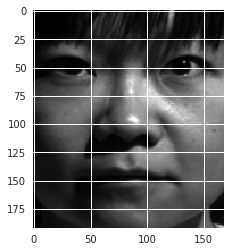

In [28]:
#Number of pictures
amount = len(imData)
#image to be printed
x = imData[np.random.randint(0,amount)]
plt.imshow(x, cmap='gray')
labels = len(np.unique(imLabels))
print ('Number of images ', amount)
print ('Number of unique labels ', labels)
plt.show()

In [29]:
x=np.array(imData)
y = np.array(imLabels)
#amount of data used for training
trnSize = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, 
    train_size=trnSize)

In [30]:
#Check that data is correct
NumberOfXSamples = len(imData)
NumberOfYSamples = len(imLabels)
if NumberOfXSamples == NumberOfYSamples:
    print('Number of samples :', NumberOfXSamples)
else:
    print('Somting fishy is going on, the Amount of X and Y do not match...')
    print('Number of X: ', NumberOfXSamples, 'and number of Y:', NumberOfYSamples)
#check the number of classes in the data
NumberOfClasses = len(np.unique(y))
print ('Number of unique classes ', NumberOfClasses)


('Number of samples :', 2432)
('Number of unique classes ', 38)


In [31]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.
x_test /= 255.

print (x_train.shape)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]* x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]* x_test.shape[2])

(486, 192, 168)


In [32]:
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)


nb_classes = len(np.unique(y_test))
print ('Number of unique classes ', nb_classes)

('Training matrix shape', (486, 32256))
('Testing matrix shape', (1946, 32256))
('Number of unique classes ', 38)


#import seaborn as sns; sns.set()
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.pipeline import make_pipeline

model = MultinomialNB()
model.fit(x_train,y_train);

y_guess = model.predict(x_test)

right = 0

wrong = 0

for i in range(len(x_test)):

    if y_test[i] == y_guess[i]:
    
        right += 1
    
    else :
        
        wrong += 1 
    
    #print('oikea', y_test[i],'arvaus', y_guess[i])

print('oikein: ',right, ' väärin: ', wrong)

In [34]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [65]:
# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 250
h=192
w=168
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, x_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(x_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

#for z in range(3):
#    i = np.random.randint(0,n_components)
#    x = eigenfaces[i]

#    plt.imshow(x, cmap='gray')
#    plt.plot()


print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print("done in %0.3fs" % (time() - t0))



Extracting the top 250 eigenfaces from 486 faces
done in 1.674s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.512s


('eigenface', 235)


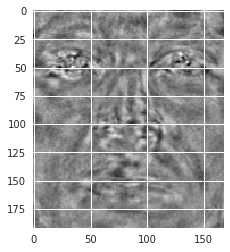

('eigenface', 125)


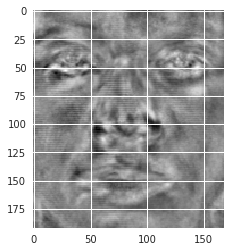

('eigenface', 31)


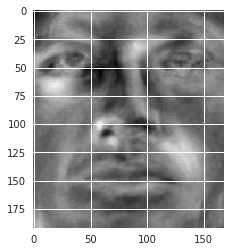

-1.37282
Original picture:
Picture as summatios of projection of eigenfaces
-1.00801
Original picture:
Picture as summatios of projection of eigenfaces
1.30703
Original picture:
Picture as summatios of projection of eigenfaces


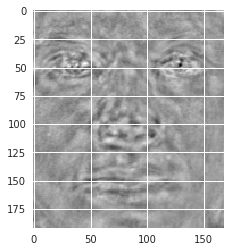

In [69]:
for z in range(3):
    i = np.random.randint(0,n_components)
    x = eigenfaces[i]
    print('eigenface',i)
    plt.imshow(x, cmap='gray')
    plt.show()


for i in [25,143,211]:
    x = []
    for j in range(250):
        if j == 0:
            print x_train_pca[i][j]
            x = np.array(x_train_pca[i][j]*eigenfaces[j])
        else:
            x += x_train_pca[i][j]*eigenfaces[i]
    y = x_train[i+1].reshape(h,w)
    print('Original picture:')
    plt.imshow(y, cmap='gray')
    plt.savefig(str(i)+'k.png')
    print('Picture as summatios of projection of eigenfaces')
    plt.imshow(x, cmap='gray')
    plt.savefig(str(i)+'eig.png')


In [19]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf = clf.fit(x_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 25.785s
Best estimator found by grid search:
SVC(C=5000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


/home/ilkka/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
target_names = []
for i in range(np.size(np.unique(y_test))):
    target_names.append(str(np.unique(y_test)[i]))
n_classes = 39

Predicting people's names on the test set
done in 0.329s
              precision    recall  f1-score   support

           1       0.67      0.67      0.67        52
           2       0.53      0.75      0.62        51
           3       0.68      0.72      0.70        47
           4       0.54      0.86      0.67        51
           5       0.90      0.62      0.74        56
           6       0.80      0.68      0.73        53
           7       0.63      0.71      0.67        56
           8       0.73      0.67      0.70        54
           9       0.63      0.69      0.66        49
          10       0.53      0.85      0.65        47
          11       0.93      0.74      0.82        53
          12       0.90      0.70      0.79        50
          13       0.96      0.47      0.63        51
          15       0.89      0.82      0.85        50
          16       0.69      0.54      0.61        57
          17       0.75      0.73      0.74        56
          18       0.79 

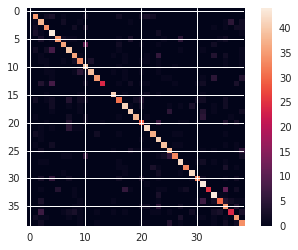

In [21]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(x_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
plt.imshow(confusion_matrix(y_test, y_pred, labels=range(n_classes)));
plt.colorbar()
plt.show()
np.savetxt('confusion_matrix.txt' , confusion_matrix(y_test, y_pred, labels=range(n_classes)))